# Sales Forecasting for Walmart

## Project Overview:
The goal of this project is to build a predictive model to forecast sales for Walmart stores. By predicting future sales, Walmart can make more informed decisions on inventory management, revenue forecasting, and investment planning. The model will help the company to:

- **Determine seasonal demand** and adjust stock levels accordingly.
- **Improve financial planning**, positively affecting stock prices and investor perceptions.
- **Forecast revenue** and identify potential growth opportunities during high-demand periods like holidays.

## Objectives:
- **Predict sales** for each store and department.
- **Identify seasonal trends** and their impact on sales.
- **Analyze the effect of external factors** such as markdowns, holidays, CPI, unemployment, and fuel prices on sales.
- **Optimize inventory levels** to prevent stockouts or overstock situations.

## Datasets:
1. **Features Data**: Contains store-level data such as temperature, fuel prices, markdowns, CPI, and unemployment rates.
2. **Stores Data**: Provides information about store types and sizes.
3. **Train Data**: Historical sales data for various stores and departments.
4. **Test Data**: Data to be used for sales prediction.

## Steps:
1. Data Understanding and Cleaning
2. Exploratory Data Analysis (EDA)
3. Feature Engineering
4. Model Development (Random Forest, ARIMA, etc.)
5. Evaluation and Insights

## Metric:
The performance of the models will be evaluated using the **Weighted Mean Absolute Error (WMAE)**, with a special focus on holiday sales.

---



In [107]:
# Importing the essential libraries
import pandas as pd   # For data manipulation and analysis
import numpy as np    # For numerical operations and array handling
import scipy.stats as stats  # For statistical analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualization (optional)

# Set visualization style
sns.set(style="whitegrid")

# Additional imports if needed for modeling later
from sklearn.model_selection import train_test_split  # For splitting data into training and testing
from sklearn.ensemble import RandomForestRegressor  # For regression modeling
from statsmodels.tsa.arima.model import ARIMA  # For time series modeling
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [55]:
# Load the CSV files into Pandas DataFrames
features_df = pd.read_csv('features.csv')
stores_df = pd.read_csv('stores.csv')
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [56]:
# Confirm the data was loaded correctly by displaying the first few rows
separator = ''.join(['*' for _ in range(50)])
print("Features Data Overview:")
print(features_df.head())
print(separator) # Line of stars

print("Stores Data Overview:")
print(stores_df.head())
print(separator)  # Line of stars

print("Train Data Overview:")
print(train_df.head())
print(separator)  # Line of stars

print("Test Data Overview:")
print(test_df.head())
print(separator)  # Line of stars

Features Data Overview:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  
**************************************************
Stores Data Overview:
   Store Type    Size
0      1  

In [57]:
# Exploring the structure of features data
print("Features Data Overview:")
features_df.head()

Features Data Overview:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [58]:
# Summary statistics of the features data
print("\nSummary Statistics of Features Data:")
features_df.describe()


Summary Statistics of Features Data:


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [59]:
# Check the shape of the features dataframe
print("Shape of Features DataFrame:")
features_df.shape

Shape of Features DataFrame:


(8190, 12)

In [60]:
# Check the data types and general information of the features dataset
print("Features Data Information:")
features_df.info()

Features Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


### Data Types Interpretation:

- **Store**: Correct as `int64`.
- **Date**: Needs conversion from `object` to `datetime`.
- **Temperature/Fuel_Price**: Correct as `float64`.
- **MarkDown1-5**: These have missing values, and the type is correct as `float64`.
- **CPI/Unemployment**: These columns also have missing values, type is correct as `float64`.
- **IsHoliday**: Correct as `bool`.

Next Steps:
- Convert `Date` column to `datetime`.
- Handle missing values in `MarkDown1-5`, `CPI`, and `Unemployment`.

In [61]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
# Verify the change
print("\nUpdated Data Types after Date Conversion:")
features_df.info()


Updated Data Types after Date Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [62]:
# Identify columns with missing values
column_to_clean = features_df.columns[features_df.isnull().any()].tolist()

# Print the columns that need cleaning
print("Columns that need cleaning")
print(column_to_clean)
# Display the first few rows of the columns that need cleaning
print(features_df[column_to_clean].head())

Columns that need cleaning
['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.242170   
2        NaN        NaN        NaN        NaN        NaN  211.289143   
3        NaN        NaN        NaN        NaN        NaN  211.319643   
4        NaN        NaN        NaN        NaN        NaN  211.350143   

   Unemployment  
0         8.106  
1         8.106  
2         8.106  
3         8.106  
4         8.106  


In [63]:
features_df.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

### Handling Missing Values in MarkDown1-5:

By grouping by **stores** and **holidays**, we can ensure that the missing values for markdowns are filled more accurately based on **historical promotional patterns** during holidays.

### Approach:

#### For Holiday Periods:
- **Group by Store and IsHoliday**: This allows us to identify patterns in markdowns during holidays for each store.
- **Calculate the average markdown** for each store during holiday periods.
- **Fill the missing values** with the **average markdown** for that store during holidays. This approach ensures we use historical data to fill in missing values where markdowns were likely applied.

#### For Non-Holiday Periods:
- **Set the missing values to 0** since no markdowns were likely applied during these periods.


In [64]:
# Fill missing MarkDown values conditionally based on IsHoliday
for column in ['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4','MarkDown5']:
    # Fill missing values for holidays with the median markdown value for that store
    features_df.loc[features_df['IsHoliday'] == True, column] = features_df[features_df['IsHoliday'] == True].groupby('Store')[column].transform(lambda x: x.fillna(x.median()))

    # Fill missing values for non-holidays with 0
    features_df.loc[features_df['IsHoliday'] == False, column] = features_df[features_df['IsHoliday'] == False][column].fillna(0)

# Verify the filled values
print("\nMissing Values after conditionally filling MarkDown columns:")
print(features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().sum())


Missing Values after conditionally filling MarkDown columns:
MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64


In [65]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [66]:
column_to_clean = ['CPI', 'Unemployment']
features_df[column_to_clean]

,CPI,Unemployment
0,211.096358,8.106
1,211.242170,8.106
2,211.289143,8.106
3,211.319643,8.106
4,211.350143,8.106
...,...,...
8185,NaN,NaN
8186,NaN,NaN
8187,NaN,NaN
8188,NaN,NaN


### Intuition for Handling Missing Values in CPI and Unemployment:

#### 1. CPI (Consumer Price Index):
- **What it represents**: CPI reflects the average change in prices paid by consumers over time for a basket of goods and services.
- **Impact on sales**: High CPI indicates inflation, which reduces consumer purchasing power, while low CPI reflects price stability, potentially boosting spending.
  
**Filling Missing Values for CPI**:
- **Assumption**: CPI typically changes gradually and missing values likely represent gaps in the data. 
- **Action**: We can fill missing CPI values using **forward fill** to propagate the last known value and maintain consistency.

#### 2. Unemployment:
- **What it represents**: Unemployment shows the percentage of the workforce that is unemployed and actively seeking employment.
- **Impact on sales**: Higher unemployment reduces consumer spending, while lower unemployment improves confidence and boosts sales.

**Filling Missing Values for Unemployment**:
- **Assumption**: Like CPI, unemployment is relatively stable week to week. Missing values can be filled using **forward fill** to maintain a smooth trend over time.
  
#### Approach:
- **Forward Fill** for both CPI and Unemployment: This ensures that we maintain consistent data for these economic indicators, avoiding sudden jumps or drops due to missing values.


In [67]:
# Filling missing values in CPI and Unemployment using forward fill
features_df[['CPI', 'Unemployment']] = features_df[['CPI', 'Unemployment']].ffill()

# Verify if all missing values are handled
print("\nMissing Values after handling CPI and Unemployment:")
print(features_df[['CPI', 'Unemployment']].isnull().sum())


Missing Values after handling CPI and Unemployment:
CPI             0
Unemployment    0
dtype: int64


# Outlier Detection and Basic Exploration

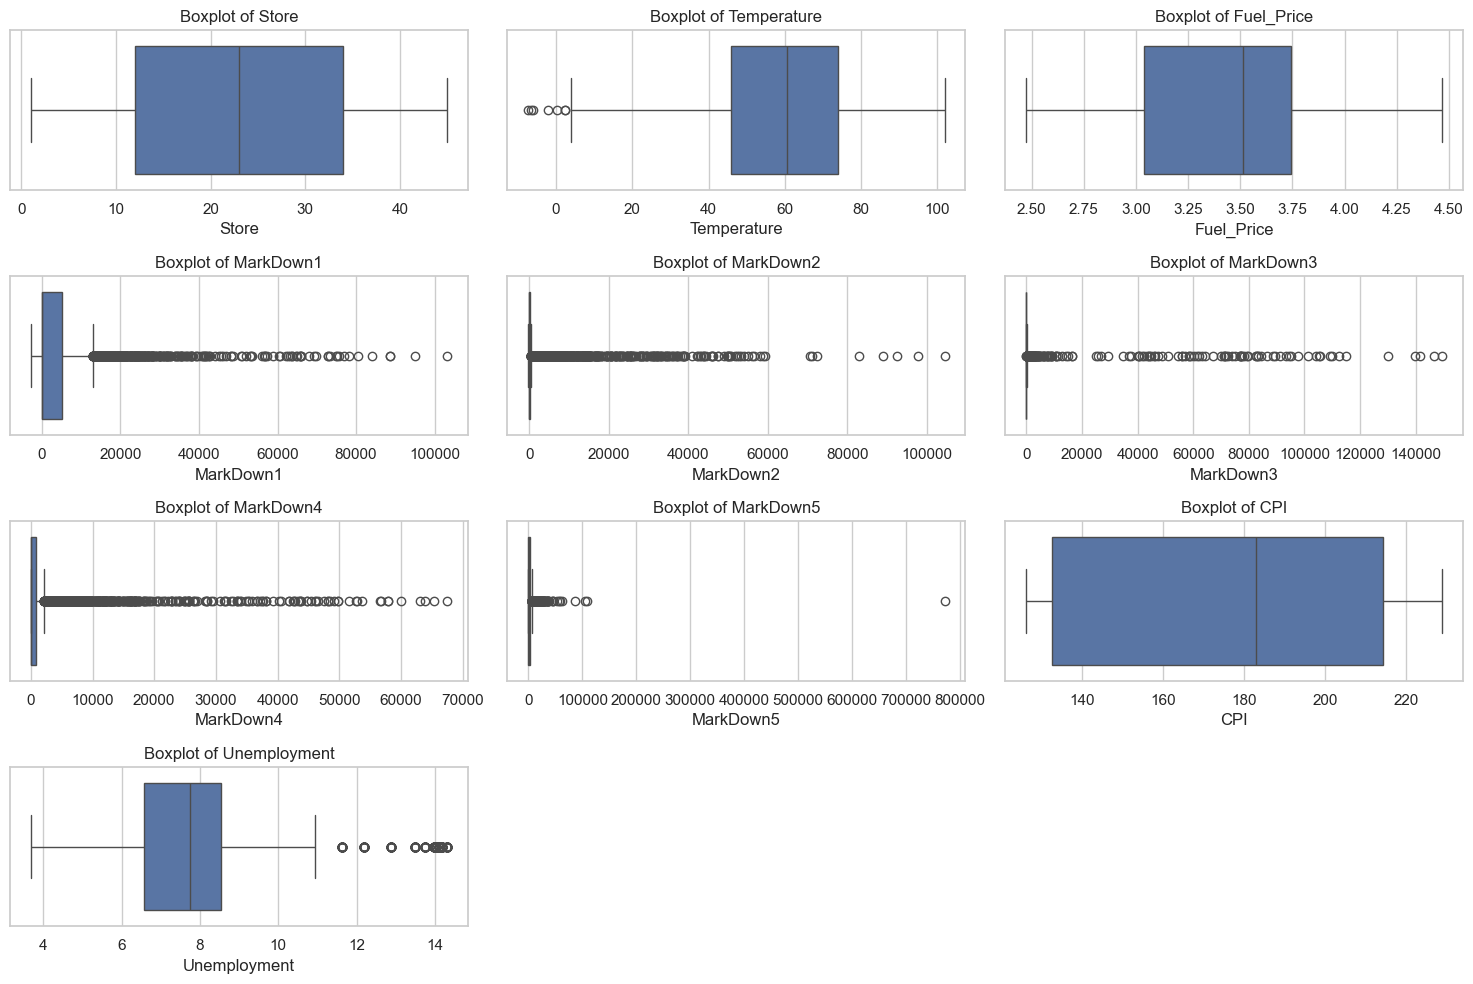

In [68]:
import math

# List of numerical columns to check for outliers
numerical_columns = features_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots based on number of numerical columns
n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Creating boxplots to detect outliers for each numerical column
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=features_df[column])
    plt.title(f"Boxplot of {column}")

# Show the boxplots
plt.tight_layout()
plt.show()





### Boxplot Interpretation Summary

1. **Store**:
   - No significant outliers, evenly distributed data.

2. **Temperature**:
   - Normal distribution, no significant outliers, data clustered between 40-80.

3. **Fuel_Price**:
   - No extreme values, tightly clustered between 2.75-4.25.

4. **MarkDown1 - MarkDown5**:
   - Significant outliers present.
   - Heavy skew towards lower values with many high outliers.
   - Further investigation required to understand exceptional markdowns.

5. **CPI (Consumer Price Index)**:
   - No significant outliers, evenly distributed between 140-220.

6. **Unemployment**:
   - Somewhat larger range, but no extreme outliers.

#### Key Insights:
- Outliers in the `MarkDown` columns suggest potential rare events or errors.
- Normalization or transformation may be needed for skewed distributions.
- Outliers should be handled carefully during modeling to avoid bias.


# Outlier Investigation of MarkDown columns

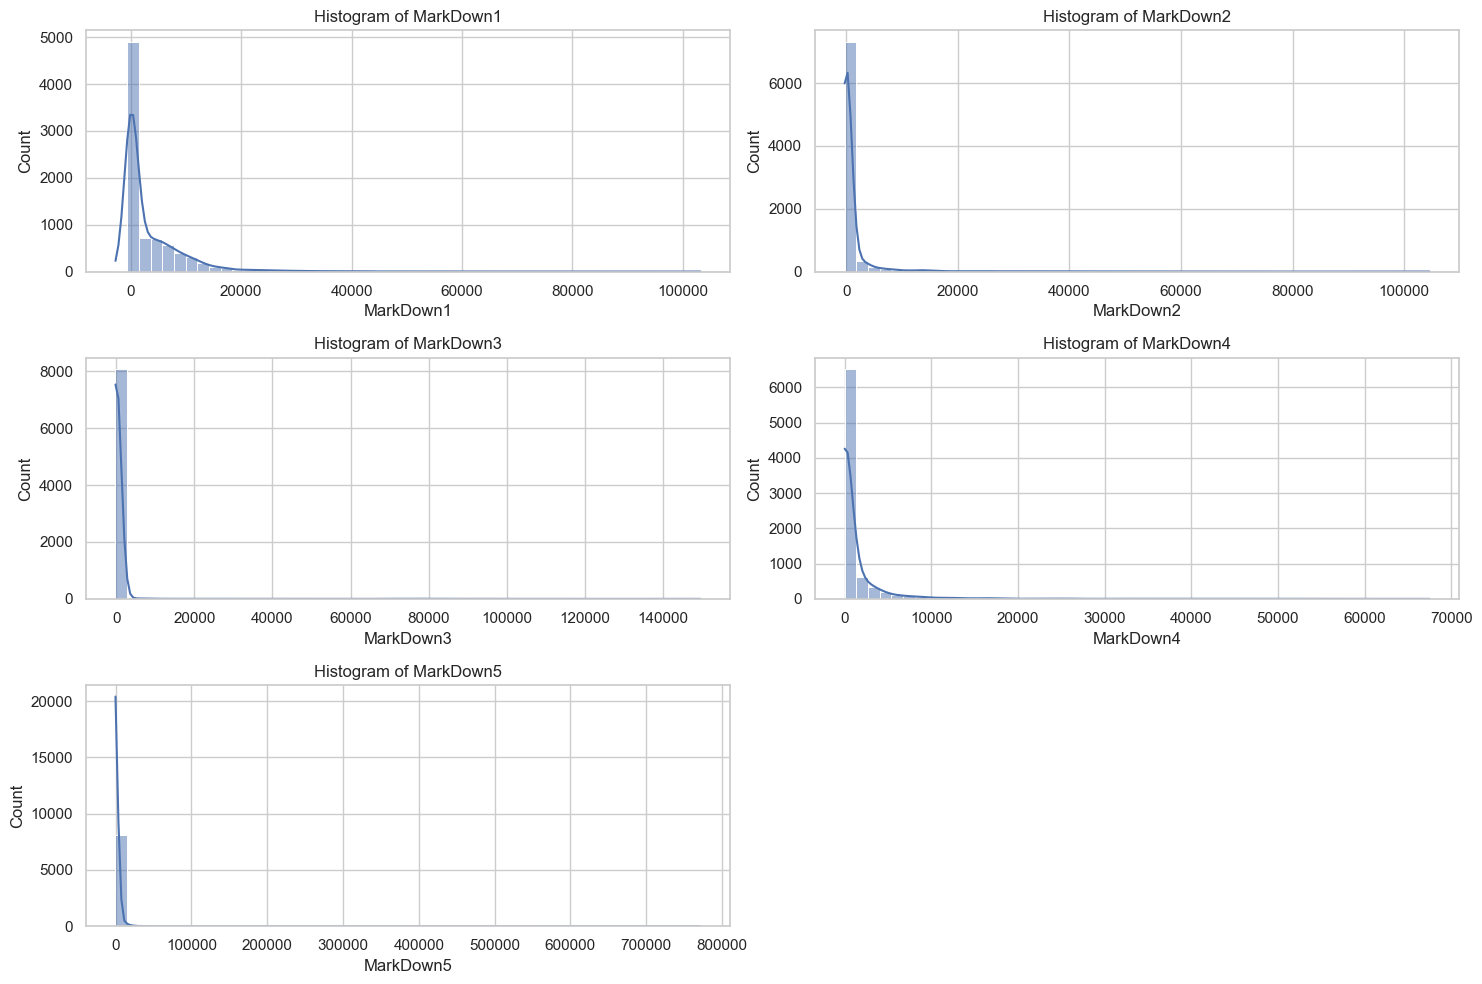

In [69]:
# Plot histograms for the MarkDown columns to further investigate their distributions
plt.figure(figsize=(15, 10))

for i, column in enumerate(['MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4','MarkDown5'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(features_df[column], bins=50, kde=True)
    plt.title(f"Histogram of {column}")

# Show histogram
plt.tight_layout()
plt.show()

### Histogram Analysis of MarkDown Columns

Looking at the histograms, the **MarkDown** columns exhibit a clear **right-skewed distribution** with a long tail. Most values are concentrated near 0, but there are some extreme values (outliers) extending far beyond the majority of the data points. 

#### Observations:

1. **Concentration of Low Values**:  
   - The majority of markdown values are small, clustered around 0, indicating markdowns are often low or absent for most entries.

2. **Long Tail**:  
   - There is a long tail extending to high values, representing the extreme outliers. This confirms that the dataset has a heavy right skew, with a few very large markdown values.

3. **Skewness**:  
   - The distributions suggest heavy skewness, which could impact the performance of certain models (e.g., linear regression). Consider using transformations (e.g., log transformation) or robust models to account for this skewness.


#### **Order of Application**:
1. Cap the outliers to limit extreme values.
2. Apply log transformation to handle skewness.
3. Normalize the data to bring the features onto a similar scale.

In [70]:
# Step 1: Cap the outliers at the 95th percentile
for column in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    cap_value = features_df[column].quantile(0.95)
    features_df[column] = features_df[column].clip(upper=cap_value)

# Step 2: Apply log transformation (handling zeros and NaNs)
for column in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    features_df[column] = np.log1p(features_df[column].replace(0, np.nan))  # Replace 0 with NaN to avoid log(0)
    features_df[column].replace([np.inf, -np.inf], np.nan, inplace=True)    # Replace infinities with NaN
    features_df[column].fillna(0, inplace=True)                             # Replace NaNs back with 0 after transformation

# Step 3: Normalize the features to bring them onto the same scale
scaler = MinMaxScaler()
features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] = scaler.fit_transform(features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']])

# Verify the transformation
print(features_df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].describe())


         MarkDown1    MarkDown2    MarkDown3    MarkDown4    MarkDown5
count  8190.000000  8190.000000  8190.000000  8190.000000  8190.000000
mean      0.438207     0.520170     0.459176     0.344772     0.460531
std       0.433155     0.240031     0.267800     0.399254     0.441071
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%       0.000000     0.346412     0.248872     0.000000     0.000000
50%       0.500220     0.346412     0.248872     0.000000     0.713816
75%       0.891700     0.745424     0.686760     0.769660     0.888278
max       1.000000     1.000000     1.000000     1.000000     1.000000


D:\Work\Gre\UTD\Courses\Fall_II\Python\Python3_12\timeseries\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4052\1849454651.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df[column].replace([np.inf, -np.inf], np.nan, inplace=True)    # Replace infinities with NaN
C:\Users\Asus\AppData\Local\Temp\ipykernel_4052\1849454651.py:10: FutureWarning: A value is trying to be s

# Revisualize the Boxplots: To confirm that the outliers have been capped and the distributions have been adjusted.

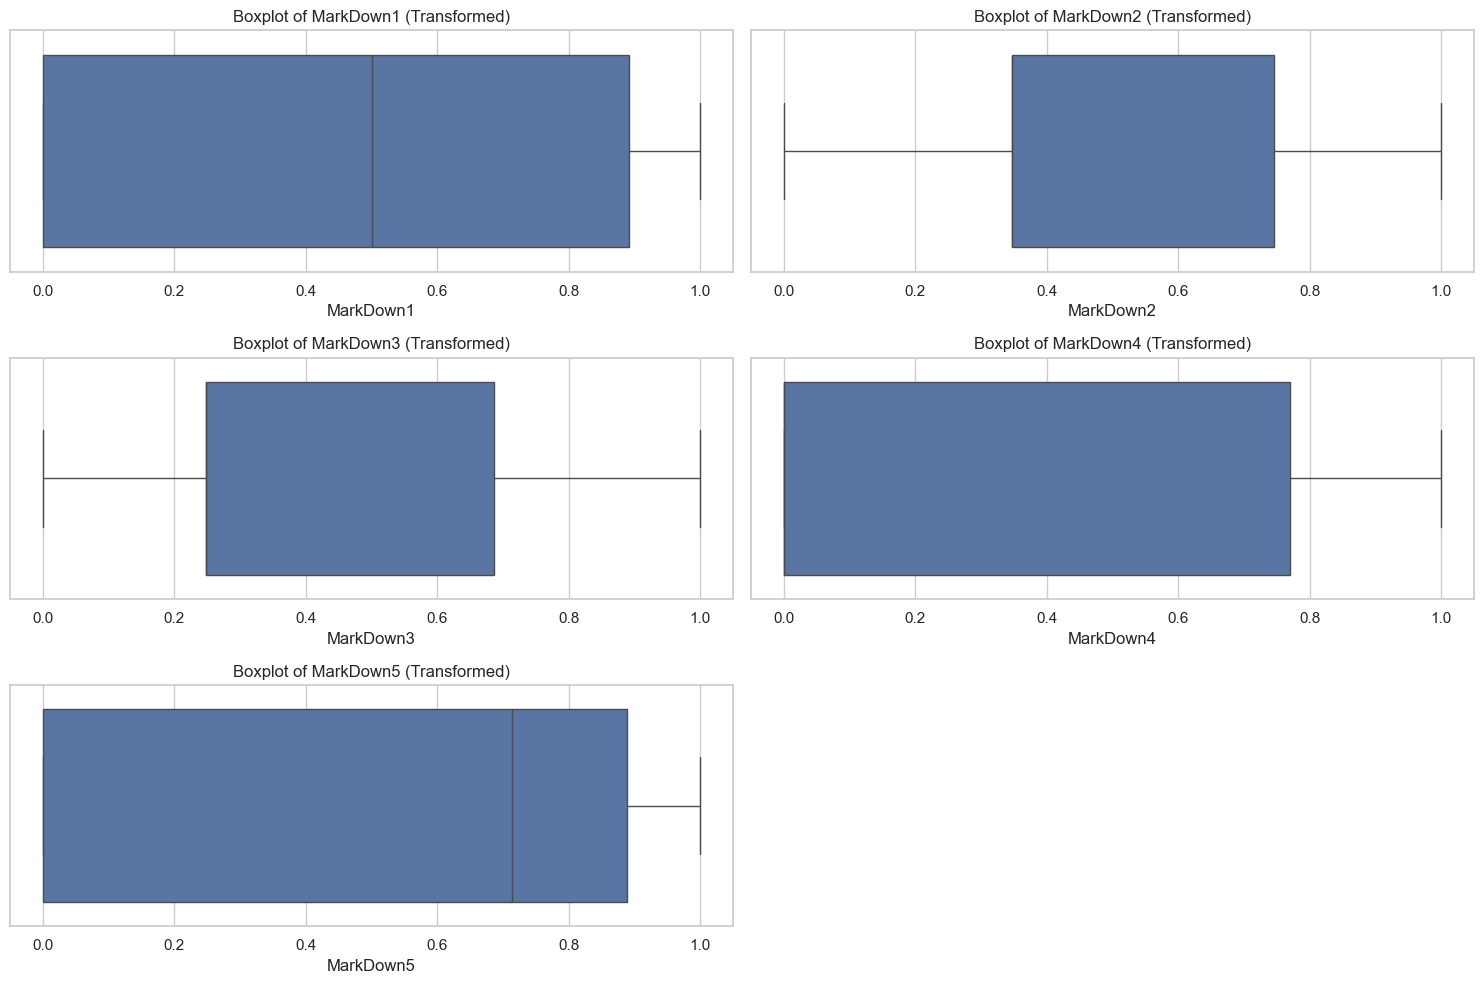

In [71]:
# Plot boxplots for the transformed MarkDown columns
plt.figure(figsize=(15,10))
for i, column in enumerate(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=features_df[column])
    plt.title(f"Boxplot of {column} (Transformed)")

plt.tight_layout()
plt.show()

# Revisualize the Histograms: To check if the skewness has been reduced by the log transformation.

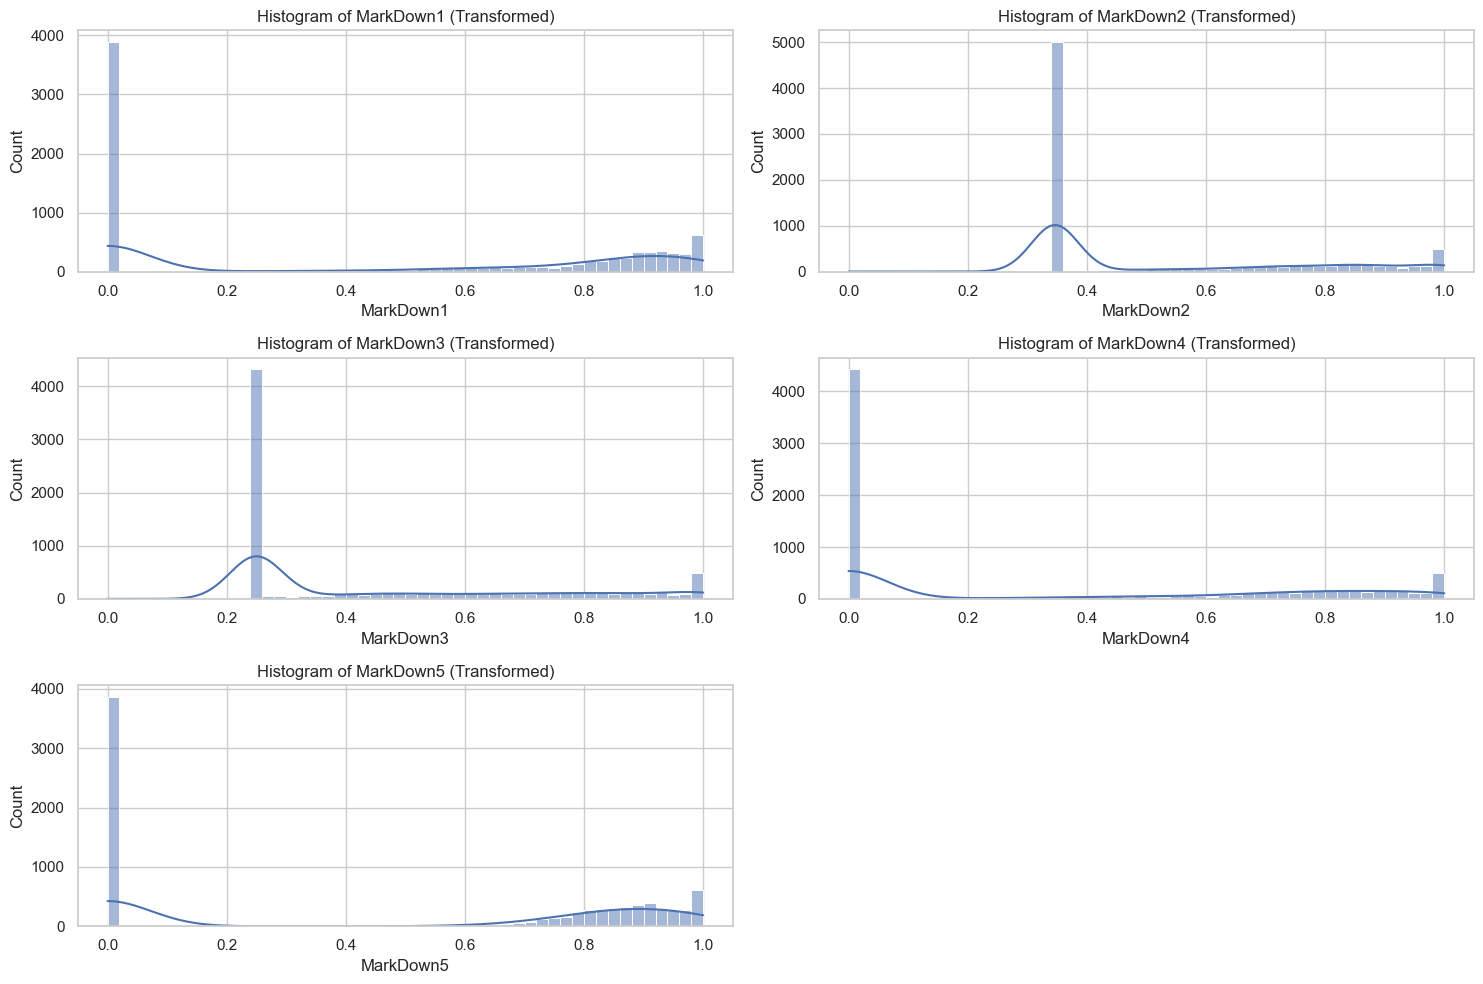

In [72]:
# Plot histograms for the transformed MarkDown columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(features_df[column], bins=50, kde=True)
    plt.title(f"Histogram of {column} (Transformed)")

plt.tight_layout()
plt.show()


### Observations:

1. **Capping Effect**:  
   - The values are now contained within the 0–1 range (due to normalization), and extreme outliers have been reduced.

2. **Log Transformation Effect**:  
   - Skewness in some columns (e.g., *MarkDown1* and *MarkDown5*) has been reduced, although a few outliers still remain.

3. **Normalization Effect**:  
   - The columns are now scaled between 0 and 1, making the features ready for modeling, especially for algorithms sensitive to feature scaling.


# Now we will focus on Second data frame: Stores

## Stores Data Overview:

    The dataset contains 45 rows and 3 columns:
        Store: The store number (integer).
        Type: The type of store (A, B, C).
        Size: The size of the store in square feet (integer).

In [73]:
# Display the first few rows of the stores data
print("Stores Data Overview:")
stores_df.head()




Stores Data Overview:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [74]:
# Check data types of each column
print("\nData Types of Stores Data:")
stores_df.info()


Data Types of Stores Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [75]:
# Get summary statistics of numerical columns
print("\nSummary Statistics of Stores Data:")
stores_df.describe()


Summary Statistics of Stores Data:


,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


### Summary Statistics:

1. **Store Size**:  
   - The size of the stores ranges from **34,875 square feet** to **219,622 square feet**, with a mean size of approximately **130,287 square feet**.

2. **Store ID**:  
   - The *Store* column identifies individual stores, with values ranging from **1 to 45**.

3. **Store Type**:  
   - The *Type* column categorizes the stores into three types: **A, B, or C**. Since this column is categorical, it doesn't provide numerical statistics.


In [76]:
# Check for missing values
print("\nShape of Stores Data:")
stores_df.shape


Shape of Stores Data:


(45, 3)

In [77]:
# Check for missing values
print("\nMissing Values in Stores Data:")
stores_df.isnull().sum()


Missing Values in Stores Data:


Store    0
Type     0
Size     0
dtype: int64

## Visualize Store Types: We can create a bar plot to see the distribution of store types (A, B, C)

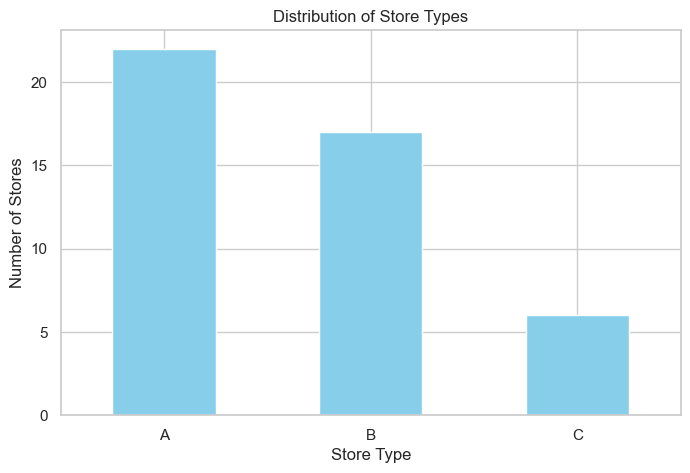

In [78]:
# Plotting the distribution of store types
plt.figure(figsize=(8, 5))
stores_df['Type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Store Types')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.xticks(rotation=0)
plt.show()

# Store Type Distribution

Here is the bar plot showing the distribution of store types (A, B, C). This visualization helps us understand the count of each store type, which can be useful for further analysis, particularly in examining whether certain types influence seasonal sales.


# Analysing Train Dataset

In [79]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [80]:
# 1. Basic Information
print("Basic Info for `train.csv`:")
train_df.info()

Basic Info for `train.csv`:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [81]:
# 2. Shape of the dataframe
print("Shape of `train.csv`:")
train_df.shape

Shape of `train.csv`:


(421570, 5)

In [82]:
# 3. Missing Values
print("\nMissing Values in `train.csv`:")
missing_values = train_df.isnull().sum()
missing_values


Missing Values in `train.csv`:


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [83]:
# 4. Changing Date type to Pandas Date DataFrame
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [84]:
# 5. Basic Information
print("Basic Info for `train.csv`:")
train_df.info()

Basic Info for `train.csv`:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [85]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [86]:
# Convert `IsHoliday` from boolean to integer (0 for False, 1 for TTrue)
train_df['IsHoliday'] = train_df['IsHoliday'].astype(int)

# Confirm the conversion
train_df[['IsHoliday']].head()

,IsHoliday
0,0
1,1
2,0
3,0
4,0


# Feature Engineering Code

In [87]:
train_df.columns.tolist()

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

In [88]:
# Extract data-based features.csv
train_df['Year'] = train_df['Date'].dt.year
train_df['Month'] = train_df['Date'].dt.month
train_df['Year'] = train_df['Date'].dt.isocalendar().week
train_df['Year'] = train_df['Date'].dt.quarter
train_df['Year'] = train_df['Date'].dt.dayofweek # 0-Monday, 6-Sunday


In [89]:
train_df.columns.tolist()

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month']

In [90]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int32         
 5   Year          421570 non-null  int32         
 6   Month         421570 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(2)
memory usage: 17.7 MB


In [91]:
# Sort by Store, Dept, and Date to prepare for rolling calculations
train_df = train_df.sort_values(by=['Store', 'Dept', 'Date'])

In [53]:
# Create Lagged and rolling average features
#train_df['Lag_1_week'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

# Similarly, calculate rolling average over the last 4 weeks, shifted by 1 to avoid data leakage
#train_df['Rolling_Mean_4_Weeks'] = train_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(4).mean()

In [92]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
0,1,1,2010-02-05,24924.50,0,4,2
1,1,1,2010-02-12,46039.49,1,4,2
2,1,1,2010-02-19,41595.55,0,4,2
3,1,1,2010-02-26,19403.54,0,4,2
4,1,1,2010-03-05,21827.90,0,4,3


In [93]:
train_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month
421565,45,98,2012-09-28,508.37,0,4,9
421566,45,98,2012-10-05,628.10,0,4,10
421567,45,98,2012-10-12,1061.02,0,4,10
421568,45,98,2012-10-19,760.01,0,4,10
421569,45,98,2012-10-26,1076.80,0,4,10


In [95]:
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Year            0
Month           0
dtype: int64

In [105]:
# Split based on a more specific date instead of just the year
split_date = '2012-07-01'  # Use July 1st, 2012 as the cutoff date

# Create training and validation sets based on the adjusted split date
train_data = train_df[train_df['Date'] < split_date].copy()
valid_data = train_df[train_df['Date'] >= split_date].copy()

# Verify the shapes of train and validation sets
print("New Shape of train_data:", train_data.shape)
print("New Shape of valid_data:", valid_data.shape)

New Shape of train_data: (371242, 7)
New Shape of valid_data: (50328, 7)


# Modeling the data

With the data prepared and split into training and validation sets, let’s proceed with the modeling phase. We’ll start by training a **Random Forest Regressor** as planned, using the **Weighted Mean Absolute Error (WMAE)** as our evaluation metric, which prioritizes accuracy on holiday periods.

### Steps for Modeling

1. **Prepare Features and Target**:
    - Define the target variable (`Weekly_Sales`) and use the engineered features for training.

2. **Train the Model**:
    - Use a **Random Forest Regressor**, which is robust to feature scaling and can handle complex relationships.

3. **Evaluate the Model Using WMAE**:
    - Implement a custom `weighted_mae` function that applies a higher error weight on holiday weeks.


In [106]:
# Define the target and features for training and validation
target = 'Weekly_Sales'
features = train_data.drop(columns=['Date', 'Weekly_Sales']) # Remove non-feature columns

# Prepare train and validation sets 
print("Preparing training and validation sets...")
X_train = train_data[features.columns]
y_train = train_data[target]
X_valid = valid_data[features.columns]
y_valid = valid_data[target]

print("\nFeature columns used for modeling:")
print(features.columns.tolist())

# Initialize and train the Random Forest Regressor 
print("\nInitializing Random Forest Rregressor with 100 trees...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

print("\nTraining the model...")
rf_model.fit(X_train, y_train) 

print("\nModel training complete.")

# Predictions
print("\nGenerating predictions on the validation set...")
y_pred = rf_model.predict(X_valid)
print("\nPredictions complete. Sample predictions:")
print(y_pred[:5])

# Define the Weighted Mean Absolute Error (WMAE) 
def weighted_mae(y_true, y_pred, is_holiday):
    weights = np.where(is_holiday, 5, 1) # Weight of 5 for holidays, 1 otherwise
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

# Calculate WMAE
print("\nCalculating Weighted Mean Absolute Error (WMAE)...")
wmae_score = weighted_mae(y_valid, y_pred, valid_data['IsHoliday'])
print("Weighted Mean Absolute Error (WMAE):", wmae_score)

# Display additional evaluation metrics
mae = mean_absolute_error(y_valid, y_pred)
print("\nAdditional Metrics:")
print("Mean Absolute Error (MAE):", mae)


Preparing training and validation sets...

Feature columns used for modeling:
['Store', 'Dept', 'IsHoliday', 'Year', 'Month']

Initializing Random Forest Rregressor with 100 trees...

Training the model...

Model training complete.

Generating predictions on the validation set...

Predictions complete. Sample predictions:
[16074.44534203 16074.44534203 16074.44534203 16074.44534203
 15416.21840146]

Calculating Weighted Mean Absolute Error (WMAE)...
Weighted Mean Absolute Error (WMAE): 1900.322867788489

Additional Metrics:
Mean Absolute Error (MAE): 1901.2156278248515


# Hyperparameter Tuning 

In [109]:
# Define the parameter grid 
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Random Forest Regressor 
rf_model = RandomForestRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit the grid search to the training data 
print("\nStarting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

# Get the best parameters and the best swmae_score
print("Best Parameters found:", grid_search.best_params_)
print("Best MAE from tuning:", -grid_search.best_score_)


Starting hyperparameter tuning...
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best MAE from tuning: 11346.52719786122


With the best parameters identified from tuning, let’s proceed by retraining the **Random Forest Regressor** on the full training set and evaluating the model using the **Weighted Mean Absolute Error (WMAE)** on the validation set.

### Steps to Complete

1. **Retrain the Model**:
    - Use the entire `train_data` to fit the Random Forest model with the optimal parameters.

2. **Predict on the Validation Set**:
    - Generate predictions on `X_valid`.

3. **Evaluate with WMAE**:
    - Calculate the WMAE to assess the model’s performance, particularly focusing on holiday impacts.


In [110]:
# Retrain the model with optimal parameters
rf_model_tuned = RandomForestRegressor(
    max_depth=10, 
    min_samples_leaf=4, 
    min_samples_split=10, 
    n_estimators=200, 
    random_state=42
)
print("Retraining model with tuned parameters...")
rf_model_tuned.fit(X_train, y_train)
print("Retraining complete.")

# Generate predictions on the validation set
y_pred_tuned = rf_model_tuned.predict(X_valid)

# Calculate WMAE on validation set
wmae_score_tuned = weighted_mae(y_valid, y_pred_tuned, valid_data['IsHoliday'])
print("Weighted Mean Absolute Error (WMAE) with Tuned Model:", wmae_score_tuned)

# Optional: Display MAE for additional insight
mae_tuned = mean_absolute_error(y_valid, y_pred_tuned)
print("Mean Absolute Error (MAE) with Tuned Model:", mae_tuned)


Retraining model with tuned parameters...
Retraining complete.
Weighted Mean Absolute Error (WMAE) with Tuned Model: 5711.850490829306
Mean Absolute Error (MAE) with Tuned Model: 5652.721466425717
